### selenium Chrome 접속  test

In [14]:
#!brew install --cask chromedriver
#!pip3 install webdriver_manager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

url = "https://www.naver.com/"
driver.get(url)
time.sleep(5)

# Blind 데이터 크롤링

In [ ]:
from selenium import webdriver

from selenium.webdriver.common.by import By

import time

import pandas as pd

import re


# https://www.teamblind.com/kr/ 에 접속 하여 기업리뷰 클릭 > 회사명 검색 회사명 클릭 후 리뷰의 상단 URL

URL = "https://www.teamblind.com/kr/company/%ED%98%84%EB%8C%80%EC%9E%90%EB%8F%99%EC%B0%A8/reviews"

# 위의 URL의 페이지의 > 버튼 클릭 후 마지막 페이지 번호 입력

lastPage = 25

# 이후 파일 실행 시 크롬브라우저가 자동 실행되고, 웹로그인 번호 입력이 나오면, 블라인드 앱 로그인 후 더보기 버튼 클릭 > 블라인드 웹 로그인 인증번호 입력


# 크롬드라이버 파일 위치로 blindCompany.py와 같은 위치에 있어야 함

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))


driver.get(URL)

driver.find_element(By.CLASS_NAME, "btn_signin").click()

time.sleep(30)


# 컨텐츠 부분 특수문제 제거 로직


def clean_str(text):

    pattern = "([ㄱ-ㅎㅏ-ㅣ]+)"  # 한글 자음, 모음 제거

    text = re.sub(pattern=pattern, repl="", string=text)

    pattern = "<[^>]*>"  # HTML 태그 제거

    text = re.sub(pattern=pattern, repl="", string=text)

    pattern = "[^\w\s]"  # 특수기호제거

    text = re.sub(pattern=pattern, repl="", string=text)

    text = text.replace("\r", ". ")

    return text


result = []

# 저장 시 헤더 값

colname = [
    "총점",
    "커리어 향상",
    "업무와 삶의 균형",
    "급여 및 복지",
    "사내 문화",
    "경영진",
    "제목",
    "직원유형",
    "장점",
    "단점",
]


for p in range(1, 40):

    targetURL = URL + "?page=" + str(p)

    driver.get(targetURL)

    elements = driver.find_elements(By.CLASS_NAME, "review_item")

    # 사이트 로딩을 위한 3초 대기로 설정해 두었으나, PC 로딩 성능에 따라서 첫번째 별점을 못가지고 오는 경우 5초 혹은 10초로 늘려서 해보길 권장함

    # 그래도 안되면, 각 페이지의 첫번째 상세 점수만 수기입력....

    time.sleep(5)

    for e in elements:

        rate = e.find_element(By.CLASS_NAME, "rating")

        # rate.find_element_by_id("button2").click()

        rate.find_element(By.CLASS_NAME, "more_rating").click()

        score = rate.find_element(By.CLASS_NAME, "num").text

        score = float(score.split("\n")[1])

        # detailScores = rate.find_elements_by_css_selector("div.ly_rating > div.rating_wp> span.desc ")

        # detailScores = rate.find_elements_by_css_selector

        # ("div.more_rating > span > span > span > div.ly_rating > div.rating_wp> span.desc > i.blind")

        detailScores = e.find_elements(
            By.CSS_SELECTOR,
            "div.review_item_inr > div.rating > div.more_rating > span > span > span > div.ly_rating > div.rating_wp> span.desc > i.blind",
        )

        title = e.find_element(
            By.CSS_SELECTOR, "div.review_item_inr > h3.rvtit > a"
        ).text

        status = e.find_element(By.CSS_SELECTOR, "div.review_item_inr > div.auth").text

        status = status.split("\n")[1]

        prosCons = e.find_elements(
            By.CSS_SELECTOR, "div.review_item_inr > div > div.parag > p > span"
        )

        value = [
            score,
            detailScores[0].text,
            detailScores[1].text,
            detailScores[2].text,
            detailScores[3].text,
            detailScores[4].text,
            title,
            status,
            clean_str(prosCons[0].text),
            clean_str(prosCons[1].text),
        ]

        result.append(value)

        print(value)


df = pd.DataFrame(result, columns=colname)

df.head()

In [16]:
import time
import pandas as pd
import re

df = pd.read_csv(
    "/Users/admin/Desktop/data_engineering_course_materials/data_engineering_course_materials/missions/W2/W2M5/blind2.csv"
)

## df 전처리 

In [17]:
df["직무"] = df["직원유형"].str.split("·").str[2].str.split("-").str[0].str.strip()
# '직원유형' 컬럼 삭제
df = df.drop(columns=["직원유형"])
df = df.drop(columns=["Unnamed: 0"])
df.head(5)

,총점,커리어 향상,업무와 삶의 균형,급여 및 복지,사내 문화,경영진,제목,장점,단점,직무
0,1.0,1,1,1,1,1,"“연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”",연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임,회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴,구매
1,1.0,1,1,1,1,1,“인재 멸시의 현대자동차”,일 안해도 월급 똑같이 줍니다\n열심히 해도 고과는 어차피 인맥이랑 짬순이라\n놀고...,일 하면 돈은 안주고 일을 더 줍니다\n능력있는 사람들은 뼛가루까지 갈아먹고\n고과...,연구개발(R&D)
2,1.0,1,1,1,1,1,“진실된 리뷰는 '추천수'로 확인하세요”,잘못된 리뷰가 많아 진실된 정보만 적습니다\n\n1 차 할인\n2 팀 분위기에 따라...,1 책임 진급 전까지 낮은 사원 기본급4000후반5000초반 타 대기업 대비 처참한...,연구개발(R&D)
3,2.0,1,5,4,3,1,"“미래가없는 회사, 꿀빠는게 답이다라고 강요하는 회사”",워라밸은 최고라해도 손색없음\n회사시스템자체가 꿀빠는게 이익이라 말하는듯한 구조\n...,의사결정 주체가 없는 덩치큰 바보회사\n서로 결정을 미루다 문제 커지면 급한사람이 ...,연구개발(R&D)
4,1.0,1,4,1,1,1,“회사가 잘나가도 입사후부터 연봉이 수직하강함”,팀만 잘 고르면 워라밸 보장\n극단적으로 하루에 한시간정도만 일해도 되는 팀도 있음,첨에 팀을 잘못골라서 밥도 못먹고 일하고 노가다 뛰기 일수였음 그런팀은 일한다고 위...,연구개발(R&D)


## KONLP 형태소분석

In [18]:
#%%bash
#apt-get update
#apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1
!pip3 install konlpy
!apt-get update -qq
!apt-get install fonts-nanum*-qq
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"  
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
zsh:1: command not found: apt-get
zsh:1: no matches found: fonts-nanum*-qq
env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [19]:
df.head(1)

,총점,커리어 향상,업무와 삶의 균형,급여 및 복지,사내 문화,경영진,제목,장점,단점,직무
0,1.0,1,1,1,1,1,"“연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”",연봉 높은 회사인줄 알고 사람들이 현차 다니는구나 라고 하는 경우가 많음 다 거짓말임,회사 유보 이익을 정당히 처분하지 않고 최상위 임원 혼자 대놓고 연봉 상승시킴,구매


In [20]:
# title
title = df["제목"].str.cat(sep=" ")
okt = Okt()  #
nouns = okt.nouns(title)  # 명사만 추출

words = [n for n in nouns if len(n) > 1]  # 단어의 길이가 1개인 것은 제외

title = Counter(
    words
)  # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [21]:
# title
pros = df["장점"].str.cat(sep=" ")
okt = Okt()  #
nouns = okt.nouns(pros)  # 명사만 추출

words = [n for n in nouns if len(n) > 1]  # 단어의 길이가 1개인 것은 제외

pros = Counter(
    words
)  # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [22]:
# title
cons = df["단점"].str.cat(sep=" ")

okt = Okt()  #
nouns = okt.nouns(cons)  # 명사만 추출

words = [n for n in nouns if len(n) > 1]  # 단어의 길이가 1개인 것은 제외

cons = Counter(
    words
)  # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

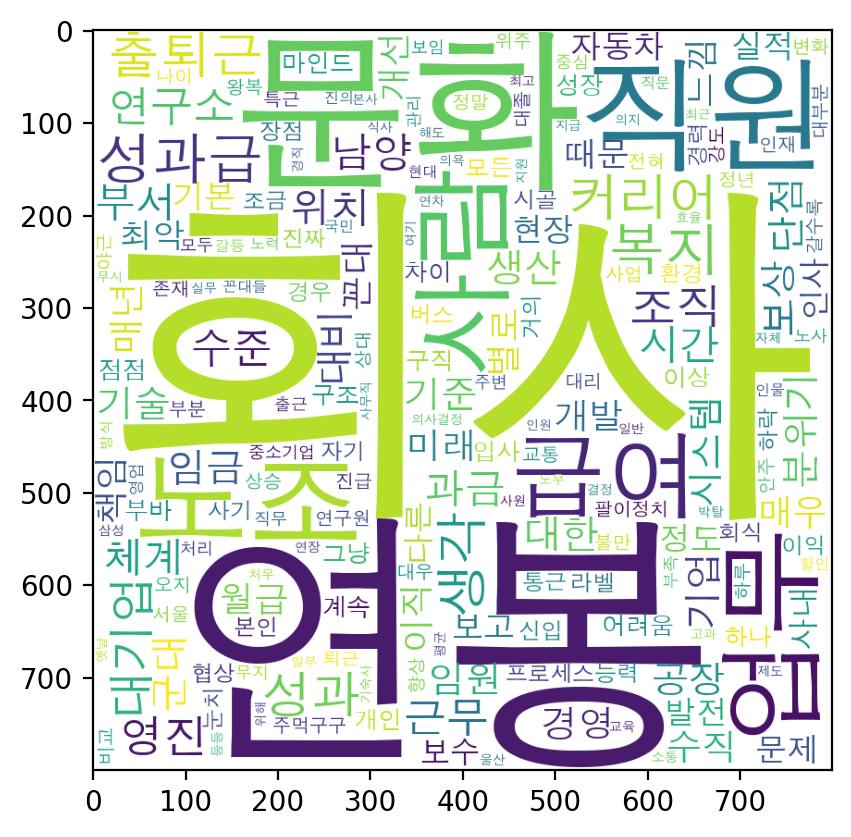

In [23]:
from PIL import Image
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# sys_font=fm.findSystemFonts()
# [f for f in sys_font if 'nanum' in f]
# img = Image.open(
#     "/Users/admin/Desktop/data_engineering_course_materials/data_engineering_course_materials/missions/W2/W2M5/america.jpeg"
# )
# img_array = np.array(img)

wc = WordCloud(
    font_path="AppleGothic",
    width=400,
    height=400,
    scale=2.0,
    max_font_size=250,
    background_color="white",
)


gen = wc.generate_from_frequencies(cons)

plt.figure()
plt.imshow(gen)

### 총점이 낮은 컬럼들의 단점 

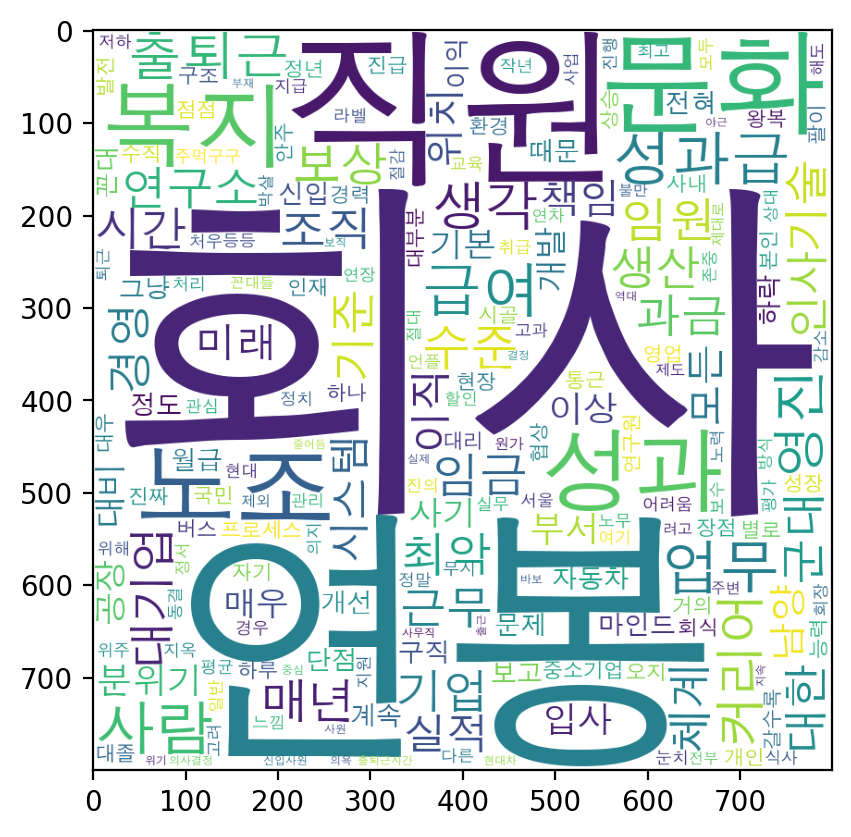

In [15]:
# title
cons = df[df["총점"] < 3]["단점"].str.cat(sep=" ")

okt = Okt()  #
nouns = okt.nouns(cons)  # 명사만 추출

words = [n for n in nouns if len(n) > 1]  # 단어의 길이가 1개인 것은 제외

cons = Counter(
    words
)  # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# sys_font=fm.findSystemFonts()
# [f for f in sys_font if 'nanum' in f]
# img = Image.open('/Users/admin/Documents/GitHub/softeer_wiki/missions/w2/현대.png')
# img_array = np.array(img)

wc = WordCloud(
    font_path="AppleGothic",
    width=400,
    height=400,
    scale=2.0,
    max_font_size=250,
    background_color="white",
)


gen = wc.generate_from_frequencies(cons)

plt.figure()
plt.imshow(gen)